# Data Survivor

Members:
1. Alexander Ptrick Surjono
2. Ramzy Mohammad
3. Retni Dewi Yulianti
4. Stella Linda Cyrilla
5. Wahyu Tri Utomo

Dataset Source: https://github.com/Syukrondzeko/Fellowship/tree/main/Practical%20Case

**Dataset "train_df.csv"**
The data set includes information about:

- Customers who left within the last month – the column is called Churn
- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device ---   protection, tech support, and streaming TV and movies
- Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
- Demographic info about customers – gender, age range, and if they have partners and dependents

# 1. Import Package

In [1]:
import jcopml

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
# from jcopml.save import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

pd.options.display.max_columns = 100

# 2. Load Dataset

In [3]:
df = pd.read_csv("train_df6.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6937,7746-AWNQW,Female,0,No,No,28,No,No phone service,DSL,No,No,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,35.75,961.4,No
6938,5996-EBTKM,Female,0,Yes,Yes,67,Yes,Yes,DSL,No,No,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),69.90,4615.9,No
6939,2758-RNWXS,Male,0,No,No,35,Yes,No,Fiber optic,Yes,No,No,Yes,No,Yes,One year,Yes,Electronic check,89.20,3251.3,No
6940,2314-TNDJQ,Female,0,Yes,Yes,72,No,No phone service,DSL,Yes,Yes,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),55.65,3880.05,No


# 3. Data Preparation 

## 3.1 Remove unnecessary columns

In [4]:
# Remove unnecessary columns
df = df.drop(columns='customerID')

## 3.2 Check Imbalance Data (Based on Churn Value)

In [5]:
# Check Imbalance Data
df.Churn.value_counts()

No     5103
Yes    1839
Name: Churn, dtype: int64

we think the dataset is still balanced, so resampling is not needed

## 3.3 Check Data Type of Each Feature

In [6]:
# Check data Type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6942 entries, 0 to 6941
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6942 non-null   object 
 1   SeniorCitizen     6942 non-null   int64  
 2   Partner           6942 non-null   object 
 3   Dependents        6942 non-null   object 
 4   tenure            6942 non-null   int64  
 5   PhoneService      6942 non-null   object 
 6   MultipleLines     6942 non-null   object 
 7   InternetService   6942 non-null   object 
 8   OnlineSecurity    6942 non-null   object 
 9   OnlineBackup      6942 non-null   object 
 10  DeviceProtection  6942 non-null   object 
 11  TechSupport       6942 non-null   object 
 12  StreamingTV       6942 non-null   object 
 13  StreamingMovies   6942 non-null   object 
 14  Contract          6942 non-null   object 
 15  PaperlessBilling  6942 non-null   object 
 16  PaymentMethod     6942 non-null   object 


it can be seen from the info above, the features of **TotalCharges** do not match the data type. It should be float instead of object datatype. Also, we'd like to convert **Churn** binary categorical into binary value (0 and 1).

#### Churn Feature

In [7]:
# Convert datatype of Churn ('No' to 0 and 'Yes' to 1)
df["Churn"].replace({"No": 0, "Yes": 1}, inplace=True)

#### TotalCharges Feature

In [8]:
# check out the features of TotalCharges
# there is an empty value, so we have to fix it
df["TotalCharges"].unique().tolist()

['29.85',
 '1889.5',
 '108.15',
 '1840.75',
 '151.65',
 '820.5',
 '1949.4',
 '301.9',
 '3046.05',
 '3487.95',
 '587.45',
 '326.8',
 '5681.1',
 '5036.3',
 '2686.05',
 '7895.15',
 '1022.95',
 '7382.25',
 '528.35',
 '1862.9',
 '39.65',
 '202.25',
 '20.15',
 '3505.1',
 '2970.3',
 '1530.6',
 '4749.15',
 '30.2',
 '6369.45',
 '1093.1',
 '6766.95',
 '181.65',
 '1874.45',
 '20.2',
 '45.25',
 '7251.7',
 '316.9',
 '3548.3',
 '3549.25',
 '1105.4',
 '475.7',
 '4872.35',
 '418.25',
 '4861.45',
 '981.45',
 '3906.7',
 '97',
 '144.15',
 '4217.8',
 '4254.1',
 '3838.75',
 '1426.4',
 '1752.65',
 '633.3',
 '4456.35',
 '1752.55',
 '6311.2',
 '7076.35',
 '894.3',
 '7853.7',
 '4707.1',
 '5450.7',
 '2962',
 '957.1',
 '857.25',
 '244.1',
 '3650.35',
 '2497.2',
 '930.9',
 '887.35',
 '49.05',
 '1090.65',
 '7099',
 '1424.6',
 '177.4',
 '6139.5',
 '2688.85',
 '482.25',
 '2111.3',
 '1216.6',
 '79.35',
 '565.35',
 '496.9',
 '4327.5',
 '973.35',
 '918.75',
 '2215.45',
 '1057',
 '927.1',
 '1009.25',
 '2570.2',
 '74.7',

Based on our observation, there are empty values in TotalCharges which aren't considered as null / nan values. These are caused by whitespace in these records. We'd like to gather these values and convert to NaN so we can handle them.

In [9]:
df[df["TotalCharges"] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [10]:
df["TotalCharges"].replace({" ": np.nan}, inplace=True)  # we try to replace the empty value to NAN

In [11]:
# Convert datatype of Churn from Object to Float

df["TotalCharges"] = df.TotalCharges.astype(float)

#### Check

In [12]:
for col in df:
  if df[col].dtypes=='object':
    print(f'{col} : {df[col].unique()}')

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


We can see that there are some columns with more than 2 categorical values.
Based on the character of columns, it seems that we can change the 'No internet service' and 'No phone service' with 'No'

In [ ]:
# Replace No internet service and No phone service to No

df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

## 3.4 Check Missing Value 

In [ ]:
# Check missing value
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There are empty values in the TotalCharges feature. These empty values will be handled in preprocessing step.

# 4. Dataset Splitting 

In [ ]:
X = df.drop(columns="Churn")
y = df.Churn

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5553, 19), (1389, 19), (5553,), (1389,))

# 5. Training

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['tenure', 'MonthlyCharges', 'TotalCharges']),
    ('categoric', cat_pipe(encoder='onehot'), ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                                              'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                              'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                                              ]),
])

pipeline = Pipeline([  
    ('prep', preprocessor),
    ('mlp', MLPClassifier(random_state=42))
])

parameter = {
    "mlp__alpha": [0.0001, 0.0003, 0.001, 0.003],
    "mlp__hidden_layer_sizes": [(16,), (32, 16), (32, 16, 8)],
    "mlp__learning_rate_init": [0.001, 0.005, 0.01],
    "mlp__activation": ["relu", "logistic", "tanh"]
}

model = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   49.9s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  6.9min finished


{'mlp__activation': 'relu', 'mlp__alpha': 0.003, 'mlp__hidden_layer_sizes': (32, 16, 8), 'mlp__learning_rate_init': 0.001}
0.8085719430938232 0.8035296236268684 0.8077753779697624


## 5.1 Feature Importance

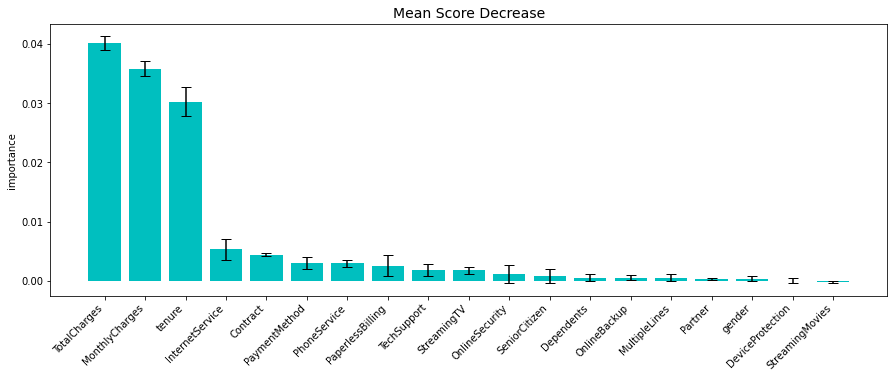

In [ ]:
df_imp = mean_score_decrease(X_train, y_train, model, plot=True)

## 5.2 Training with Feature Importance

In [ ]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['tenure', 'MonthlyCharges', 'TotalCharges']),
    ('categoric', cat_pipe(encoder='onehot'), ['SeniorCitizen', 'Dependents', 'PhoneService', 'MultipleLines',
                                              'InternetService', 'OnlineSecurity', 'OnlineBackup', 'TechSupport',
                                              'StreamingTV', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                                              ]),
])

pipeline = Pipeline([  
    ('prep', preprocessor),
    ('mlp', MLPClassifier(random_state=42))
])

parameter = {
    "mlp__alpha": [0.0001, 0.0003, 0.001, 0.003],
    "mlp__hidden_layer_sizes": [(16,), (32, 16), (32, 16, 8)],
    "mlp__learning_rate_init": [0.001, 0.005, 0.01],
    "mlp__activation": ["relu", "logistic", "tanh"]
}

model_2 = GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1, verbose=1)
model_2.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.8s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  2.5min finished


{'mlp__activation': 'logistic', 'mlp__alpha': 0.0001, 'mlp__hidden_layer_sizes': (16,), 'mlp__learning_rate_init': 0.001}
0.801368629569602 0.8024491265982352 0.796976241900648


# 6. Predict

Churn = 1 and No Churn = 0

In [ ]:
test = pd.read_csv('test_df6.csv')
test.head(1)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0032-PGELS,Female,0,Yes,Yes,1,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),30.5,30.5


In [ ]:
# drop unneeded columns
test.drop(columns=['Unnamed: 0', 'customerID'], inplace=True)

In [ ]:
hasil = model.predict(test)

In [ ]:
hasil

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=int64)

In [ ]:
test['predict'] = hasil

In [ ]:
test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,predict
0,Female,0,Yes,Yes,1,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),30.50,30.50,0
1,Male,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.10,53.05,0
2,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),98.30,6859.50,0
3,Female,0,No,Yes,48,No,No phone service,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),45.55,2108.35,0
4,Male,0,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),101.05,6770.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
96,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
97,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
98,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


# 7. Save to CSV

In [ ]:
test2 = pd.read_csv('test_df6.csv')
test2['predict'] = hasil

In [ ]:
test2.to_csv('mantaps.csv')

# Cara Kedua

# 1. Import Package

In [1]:
import jcopdl, luwiji
jcopdl.__version__, luwiji.__version__

('1.1.1', '1.1.8')

# 1. Import Package

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease

In [3]:
import torch
from torch import nn, optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# 2. Import Data

In [39]:
df = pd.read_csv("data/data/train_df6.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Secara Domain knowladge, kita tidak akan buang semua fitur

# 3. Data Preparation 

## 3.1 Remove unnecessary columns

In [40]:
# Remove unnecessary columns
df = df.drop(columns='customerID')

## 3.2 Check Imbalance Data

In [41]:
# Check Imbalance Data
df.Churn.value_counts()

No     5103
Yes    1839
Name: Churn, dtype: int64

we think the dataset is still balanced, so resampling is not needed

## 3.3 Check Data Type of Each Feature

In [42]:
# Check data Type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6942 entries, 0 to 6941
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            6942 non-null   object 
 1   SeniorCitizen     6942 non-null   int64  
 2   Partner           6942 non-null   object 
 3   Dependents        6942 non-null   object 
 4   tenure            6942 non-null   int64  
 5   PhoneService      6942 non-null   object 
 6   MultipleLines     6942 non-null   object 
 7   InternetService   6942 non-null   object 
 8   OnlineSecurity    6942 non-null   object 
 9   OnlineBackup      6942 non-null   object 
 10  DeviceProtection  6942 non-null   object 
 11  TechSupport       6942 non-null   object 
 12  StreamingTV       6942 non-null   object 
 13  StreamingMovies   6942 non-null   object 
 14  Contract          6942 non-null   object 
 15  PaperlessBilling  6942 non-null   object 
 16  PaymentMethod     6942 non-null   object 


it can be seen from the info above, the features of **Churn** and **TotalCharges** do not match the data type

#### Churn Feature

In [43]:
# Convert datatype of Churn from Object to Float
df["Churn"].replace({"No": 0, "Yes": 1}, inplace=True)

#### TotalCharges Feature

In [44]:
# check out the features of TotalCharges
# there is an empty value, so we have to fix it
df["TotalCharges"].unique().tolist()

['29.85',
 '1889.5',
 '108.15',
 '1840.75',
 '151.65',
 '820.5',
 '1949.4',
 '301.9',
 '3046.05',
 '3487.95',
 '587.45',
 '326.8',
 '5681.1',
 '5036.3',
 '2686.05',
 '7895.15',
 '1022.95',
 '7382.25',
 '528.35',
 '1862.9',
 '39.65',
 '202.25',
 '20.15',
 '3505.1',
 '2970.3',
 '1530.6',
 '4749.15',
 '30.2',
 '6369.45',
 '1093.1',
 '6766.95',
 '181.65',
 '1874.45',
 '20.2',
 '45.25',
 '7251.7',
 '316.9',
 '3548.3',
 '3549.25',
 '1105.4',
 '475.7',
 '4872.35',
 '418.25',
 '4861.45',
 '981.45',
 '3906.7',
 '97',
 '144.15',
 '4217.8',
 '4254.1',
 '3838.75',
 '1426.4',
 '1752.65',
 '633.3',
 '4456.35',
 '1752.55',
 '6311.2',
 '7076.35',
 '894.3',
 '7853.7',
 '4707.1',
 '5450.7',
 '2962',
 '957.1',
 '857.25',
 '244.1',
 '3650.35',
 '2497.2',
 '930.9',
 '887.35',
 '49.05',
 '1090.65',
 '7099',
 '1424.6',
 '177.4',
 '6139.5',
 '2688.85',
 '482.25',
 '2111.3',
 '1216.6',
 '79.35',
 '565.35',
 '496.9',
 '4327.5',
 '973.35',
 '918.75',
 '2215.45',
 '1057',
 '927.1',
 '1009.25',
 '2570.2',
 '74.7',

In [45]:
df[df["TotalCharges"] == ' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,0
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,0
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,0
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,0
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,0
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,0
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,0
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,0
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,0
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,0


In [46]:
df["TotalCharges"].replace({" ": np.nan}, inplace=True)  # we try to replace the empty value to NAN

In [47]:
# Convert datatype of Churn from Object to Float

df["TotalCharges"] = df.TotalCharges.astype(float)

#### other features

In [48]:
# check features that have problems
print("MutipeLines:")
display(df.MultipleLines.unique())
print("OnlineSecurity")
display(df.OnlineSecurity.unique())
print("OnlinrBackup")
display(df.OnlineBackup.unique())
print("DeviceProtection")
display(df.DeviceProtection.unique())
print("TechSupport")
display(df.TechSupport.unique())
print("StreamingTV")
display(df.StreamingTV.unique())
print("StreamingMovier")
display(df.StreamingMovies.unique())

MutipeLines:


array(['No phone service', 'No', 'Yes'], dtype=object)

OnlineSecurity


array(['No', 'Yes', 'No internet service'], dtype=object)

OnlinrBackup


array(['Yes', 'No', 'No internet service'], dtype=object)

DeviceProtection


array(['No', 'Yes', 'No internet service'], dtype=object)

TechSupport


array(['No', 'Yes', 'No internet service'], dtype=object)

StreamingTV


array(['No', 'Yes', 'No internet service'], dtype=object)

StreamingMovier


array(['No', 'Yes', 'No internet service'], dtype=object)

In [49]:
# Replace No internet service and No phone service to No

df.replace('No internet service','No',inplace=True)
df.replace('No phone service','No',inplace=True)

## 3.4 Check Missing Value 

In [50]:
# Check missing value
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

There is an empty value in the TotalCharges feature

# 4. Dataset Splitting

Pandas -> Array -> Tensor

Karena tidak bisa convert secara langsung dari Pandas ke Tensor, maka y harus diubah dulu dari pandas ke tensor y = df.Outcome -> y = df.Outcome.value

In [51]:
X = df.drop(columns="Churn")
y = df.Churn.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5553, 19), (1389, 19), (5553,), (1389,))

In [52]:
X_test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
6802,Female,0,No,No,20,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),89.10,1879.25
5738,Male,0,No,No,1,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.60,20.60
4698,Female,1,Yes,No,66,Yes,Yes,DSL,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),80.55,5265.10
895,Male,0,No,No,30,Yes,Yes,Fiber optic,Yes,Yes,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),94.30,2679.70
4139,Male,1,No,No,24,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,80.50,2088.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4430,Female,0,Yes,Yes,32,Yes,No,DSL,Yes,Yes,No,Yes,No,No,Month-to-month,No,Bank transfer (automatic),61.40,1864.65
5406,Male,0,Yes,Yes,71,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,Two year,Yes,Electronic check,97.20,6910.30
5891,Male,0,No,No,11,No,No,DSL,No,No,Yes,No,Yes,No,One year,Yes,Electronic check,41.60,470.60
2877,Female,0,Yes,Yes,61,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.15,6010.05


# 5. Preprocess Data

In [17]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4350,Male,0,Yes,No,33,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),44.55,1462.6
4069,Male,0,Yes,Yes,68,Yes,No,Fiber optic,Yes,No,No,Yes,Yes,Yes,Two year,Yes,Electronic check,99.55,6668.0
1297,Female,0,No,No,5,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,75.60,402.5
4785,Male,0,No,No,18,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,80.65,1451.9
5913,Female,0,No,No,26,Yes,No,Fiber optic,Yes,No,Yes,Yes,No,No,One year,Yes,Credit card (automatic),87.15,2274.1


Preprocessor disini diguakan hanya untuk membantu Impute Missing Data

In [18]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(), ['tenure', 'MonthlyCharges', 'TotalCharges']),
    ('categoric', cat_pipe(encoder='onehot'), ['SeniorCitizen', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                                              'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                                              'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
                                              ]),
])

In [19]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [20]:
X_train # bentuknya berubah menjadi Array, sehingga bisa langsung di convert ke Tensor 

array([[3.30000e+01, 4.45500e+01, 1.46260e+03, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00],
       [6.80000e+01, 9.95500e+01, 6.66800e+03, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [5.00000e+00, 7.56000e+01, 4.02500e+02, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       ...,
       [1.00000e+00, 4.51000e+01, 4.51000e+01, ..., 0.00000e+00,
        1.00000e+00, 0.00000e+00],
       [6.30000e+01, 8.40000e+01, 5.32955e+03, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [2.50000e+01, 4.06500e+01, 9.70550e+02, ..., 1.00000e+00,
        0.00000e+00, 0.00000e+00]])

## 5.1 Dataset & Dataloader

Karena kita akan bermain dengan PyTorch maka Numpy Array akan diubah ke Tensor

Next, kalo di Pytorch bentuk komputasi harus berbentuk Tensor

jadi kita convert dahulu data kita X_train, X_test, y_train, y_test ke bentuk Tensor<br>

karena pada data kita y memiliki 2 kelas 0 dan 1, maka kita gunakan logsoftmax dan y_train= torch.LongTensor(y_train).to(device)<br>

bisa juga data kita y memliki 2 kelas 0 dan 1, kita pakai sigmoid dan y_train = torch.FloatTensor(y_train).to(device)

<br> 
karena data y yang memiliki kelas 0 dan 1 ketika menggunakan sigmoid maka y memiliki nilai dari 0 sampai 1(Probabilitas) oleh karena itu digunakan FloatTensor 


In [21]:
X_train = torch.FloatTensor(X_train).to(device) 
X_test = torch.FloatTensor(X_test).to(device)
y_train = torch.LongTensor(y_train).to(device)
y_test = torch.LongTensor(y_test).to(device)

In [22]:
import torch
from torch.utils.data import DataLoader, TensorDataset

Kita akan membuat sebuah dataset dan dataloader

Dataloader tujuannya untuk membuat 'MINIBATCH'

In [23]:
train_set = TensorDataset(X_train, y_train)
trainloader = DataLoader(train_set, batch_size=64, shuffle=True)


test_set = TensorDataset(X_test, y_test)
testloader = DataLoader(test_set, batch_size=64, shuffle=True)


# 6. Training Preparation -> MCO

In [24]:
X_train.shape

torch.Size([5553, 39])

Berdasarkan info di atas terdapat 39 fitur

In [25]:
model = nn.Sequential(
    nn.Linear(39, 16),
    nn.ReLU(),
    nn.Linear(16, 8),
    nn.ReLU(),
    nn.Linear(8, 4),
    nn.ReLU(),
    nn.Linear(4, 2),
    nn.LogSoftmax(1) # kenapa 1? silahkan lihat video S5E4 menit 22 an
).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)

## 6.1 Training

In [26]:
epochs = 1000
train_cost, test_cost = [], []
for i in range(epochs):
    model.train()
    cost = 0
    for feature, target in trainloader:
        output = model(feature) # feedforward
        loss = criterion(output, target)
        loss.backward() # backprop
        
        optimizer.step() #update weight
        optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    train_cost.append(cost / len(train_set))
    
    with torch.no_grad():
        model.eval()
        cost = 0
        for feature, target in testloader:
            output = model(feature) # feedforward
            loss = criterion(output, target)
            
            cost += loss.item() * feature.shape[0]
        test_cost.append(cost / len(test_set))
    
            
    
    print(f"\rEpoch: {i+1:4}/{epochs:4} | train_cost: {train_cost[-1]:.4f} | test_cost: {test_cost[-1]:.4f}", end=" ")

Epoch: 1000/1000 | train_cost: 0.3960 | test_cost: 0.4235   

# 6.2 Cost History

In [27]:
import matplotlib.pyplot as plt

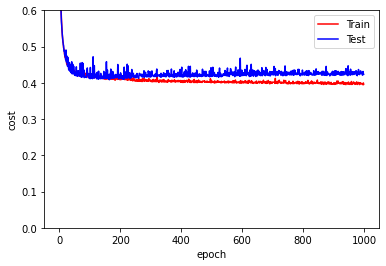

In [31]:
plt.plot(train_cost, 'r-', label='Train')
plt.plot(test_cost, 'b-', label='Test')
plt.ylim([0, 0.6])
plt.xlabel('epoch'); plt.ylabel('cost'); plt.legend();

Terlihat sepertinya kita hanya butuh 200 epoch. Tapi jika kita run ulang dan kalo kita pakai 200 epoch bisa jadi train dan testnya tidak bagus di 200 epoch 

dari plot di atas model kita masih jelek karena overfit antara train dan test

# 7. Predict with X_test

In [32]:
with torch.no_grad():
    model.eval()
    output = model(X_test)
        

In [33]:
output

tensor([[-0.5001, -0.9326],
        [-0.2370, -1.5558],
        [-0.0714, -2.6744],
        ...,
        [-0.3472, -1.2264],
        [-0.4632, -0.9922],
        [-0.0080, -4.8309]])

## 7.1 Result

In [35]:
pred = output.argmax(1)
pred.tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,


## 7.2 Accuracy

In [36]:
acc = (y_test == pred).to(torch.float32).mean()
acc

tensor(0.7977)

# 8.Predict

In [56]:
test = pd.read_csv('data/data/test_df6.csv')

In [66]:
test.drop(columns=['Unnamed: 0', 'customerID'], inplace=True)

In [67]:
test_1 = preprocessor.transform(test)
test_2 = torch.FloatTensor(test_1).to(device)

c:\users\asus\appdata\local\programs\python\python38\lib\site-packages\sklearn\compose\_column_transformer.py:437: FutureWarning: Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.
  warnings.warn("Given feature/column names or counts do not match "


In [68]:
model.state_dict()

OrderedDict([('0.weight',
              tensor([[ 1.7480e-02, -6.3853e-02, -6.2164e-02,  2.3842e-02,  2.2701e-02,
                        2.0150e-02,  2.6737e-02,  3.1159e-02,  3.3284e-02, -2.8782e-02,
                       -3.9989e-02,  5.9446e-02,  6.2205e-02, -5.2909e-02, -1.3427e-02,
                       -1.6034e-02, -1.8963e-02, -5.7723e-02,  2.0950e-02,  2.0568e-03,
                       -7.2032e-03,  3.4501e-02,  6.3552e-03, -7.8101e-03, -3.2513e-02,
                       -1.3837e-02,  4.4269e-02,  3.4601e-03,  5.0311e-02, -3.6810e-02,
                       -6.1804e-02, -5.7324e-02,  4.2907e-02, -2.8493e-02,  5.9011e-02,
                        1.3983e-02,  2.5770e-02, -3.4220e-02, -2.6824e-02],
                      [ 4.2929e-01,  1.5364e-01, -1.1360e-02, -4.1179e-01,  1.4280e+00,
                       -2.1999e-01,  4.8554e-01,  4.1053e-01, -4.8521e-01,  2.5342e-01,
                       -3.5229e-01,  1.0291e+00, -2.7660e-01, -2.9580e-01,  9.5647e-01,
                  

In [69]:
with torch.no_grad(): # dihasilkan akurasi berdasarkan weights yang acak
    model.eval()
    output = model(test_2)
    pred = output.argmax(1)

In [70]:
pred

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0])

In [71]:
test['predict'] = pred

In [72]:
test

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,predict
0,Female,0,Yes,Yes,1,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),30.50,30.50,1
1,Male,0,No,No,3,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,19.10,53.05,0
2,Male,0,Yes,Yes,70,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Two year,No,Bank transfer (automatic),98.30,6859.50,0
3,Female,0,No,Yes,48,No,No phone service,DSL,No,Yes,Yes,No,No,Yes,Month-to-month,No,Credit card (automatic),45.55,2108.35,0
4,Male,0,Yes,Yes,68,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,One year,Yes,Credit card (automatic),101.05,6770.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0
96,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0
97,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
98,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,1


# 9. Save Model

In [73]:
test.to_csv('mantap2.csv')

link csv mantap2: https://drive.google.com/drive/u/0/folders/1LajEJRJlIVHUs9cuIqgjtY6NkqKcupvL